In [2]:
import numpy as np
import pandas as pd
import scipy as sy
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
boston = pd.read_csv('boston.csv')

In [20]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [21]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [22]:
boston.shape

(506, 14)

In [23]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PT', 'B', 'LSTAT', 'MV'],
      dtype='object')

In [25]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [33]:
features = boston.iloc[:,0:13]
labels = boston.iloc[:,-1]

In [34]:
features.shape

(506, 13)

In [35]:
labels.shape

(506,)

In [102]:
#Creating Training and Testing Set : 80 - 20
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.20, random_state=5)

In [103]:
#Training Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
#Testing Model
y_predict = model.predict(X_test)

In [105]:
y_predict

array([37.56311815, 32.14445085, 27.06573604,  5.67080658, 35.09982562,
        5.85803674, 27.5370839 , 31.81019134, 26.35634916, 22.77208751,
       31.91183008, 21.50224054, 23.70119994, 33.3622511 , 28.51633608,
       14.39456843,  0.19284023, 18.66247088, 13.71004074, 14.13408704,
        2.03263864, 19.72808329, 38.18657394, 24.19760042, 31.30247882,
       11.14144481, 25.03636904, 23.27971008, 22.49420117, 20.52972623,
       15.16513782,  6.92553599, 18.35577303, 22.37179848, 28.91287906,
       19.02980772, 30.1935729 ,  8.74384875, 40.86691315, 34.53763686,
       20.70224772,  2.59618889, 29.99590303, 12.15704709, 27.10186401,
       30.80524316, -6.24169095, 19.84885797, 20.92973433, 12.43523784,
       20.49499463, 19.19231749, 23.6907308 , 12.67998523, 17.14252431,
       25.04649202, 34.77758199, 15.23294953, 28.22306243, 21.08745409,
       20.39506064, 25.79476906, 14.72463484, 33.18634979, 23.17771272,
       13.11057171, 19.23154572, 24.61162985, 21.50327026, 22.00

In [106]:
Y_test

226    37.599998
292    27.900000
90     22.600000
373    13.800000
273    35.200001
417    10.400000
503    23.900000
234    29.000000
111    22.799999
472    23.200001
99     33.200001
339    19.000000
309    20.299999
304    36.099998
272    24.400000
346    17.200001
412    17.900000
151    19.600000
496    19.700001
410    15.000000
490     8.100000
132    23.000000
224    44.799999
318    23.100000
284    32.200001
444    10.800000
321    23.100000
116    21.200001
333    22.200001
351    24.100000
         ...    
49     19.400000
409    27.500000
407    27.900000
353    30.100000
170    17.400000
149    15.400000
263    31.000000
421    14.200000
471    19.600000
163    50.000000
221    21.700001
434    11.700000
66     19.400000
449    13.000000
499    17.500000
392     9.700000
297    20.299999
352    18.600000
186    50.000000
21     19.600000
479    21.400000
442    18.400000
329    22.600000
52     25.000000
134    15.600000
349    26.600000
212    22.400000
156    13.1000

In [107]:
#Training Score
model.score(X_train, Y_train)

0.7383393951297181

In [108]:
#Accuracy Score
model.score(X_test, Y_test)

0.7334492070426775

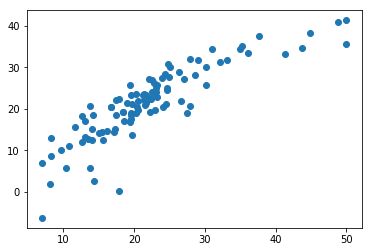

In [109]:
plt.scatter(Y_test, y_predict)

In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_predict)
mse

20.86929246693511